# Analisa Anime Apakah yang Diproduksi

Studio Markenji adalah suatu studio yang membuat animasi dari komik menjadi anime. Disini perusahaan merasa bingung syarat syarat atau ketentuan apakah yang harus mereka ambil ketika melakukan penyelesian dari komik yang akan di adaptasikan menjadi anime. 

### BUSINESS PROBLEM

### Library

In [1]:
import pandas as pd
import numpy as np

# library for visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

### Mengumpulkan Data

In [2]:
df = pd.read_csv("E:/MY PORTO/archive/merger.csv")
df.head()

C:\Users\Markenji\AppData\Local\Temp\ipykernel_2104\1595017044.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:/MY PORTO/archive/merger.csv")


,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anime_id,7813727.0,NaN,NaN,NaN,8909.045304,8883.922998,1.0,1240.0,6213.0,14093.0,34519.0
name,7813727,11196,Death Note,39340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,7813617,3154,Hentai,62435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7813723,6,TV,5283596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,7813727.0,274.0,1.0,1752307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_x,7813721.0,NaN,NaN,NaN,7.653127,0.673029,1.67,7.27,7.68,8.13,9.5
members,7813727.0,NaN,NaN,NaN,178620.804981,188176.417151,29.0,44030.0,110470.0,244268.0,1013917.0
user_id,7813727.0,NaN,NaN,NaN,36727.954737,20997.950759,1.0,18974.0,36791.0,54757.0,73516.0
rating_y,7813727.0,NaN,NaN,NaN,6.144036,3.727796,-1.0,6.0,7.0,9.0,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 536.5+ MB


### Membersihkan Data

#### HILANGKAN DUPLICAT

In [5]:
df2 = df.copy()
df2.tail()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1
7813726,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,48766,-1


In [6]:
df2.shape

(7813727, 9)

In [7]:
df2.duplicated(subset=['name']).sum()

7802531

In [8]:
df2 = df2.drop_duplicates(subset=['name'])
df2.tail()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
7813710,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7
7813714,5543,Under World,Hentai,OVA,1,4.28,183,39532,-1
7813718,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1
7813721,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [9]:
df2.shape

(11196, 9)

#### HILANGKAN MISSING VALUE

In [10]:
df2.isnull().any(axis = 1).sum()

35

In [11]:
df2.dropna(inplace = True)

In [12]:
df2.isnull().any(axis = 1).sum()

0

In [13]:
df2.drop('anime_id', axis=1, inplace = True)

In [14]:
df2

,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
26773,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
28159,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
47442,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9
...,...,...,...,...,...,...,...,...
7813710,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7
7813714,Under World,Hentai,OVA,1,4.28,183,39532,-1
7813718,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1
7813721,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1


In [15]:
df2['genre2'] = df2['genre'].str.split(',')
df2

,name,genre,type,episodes,rating_x,members,user_id,rating_y,genre2
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,"[Drama, Romance, School, Supernatural]"
2199,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10,"[Action, Adventure, Drama, Fantasy, Magic,..."
26773,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1,"[Action, Comedy, Historical, Parody, Samur..."
28159,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9,"[Sci-Fi, Thriller]"
47442,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9,"[Action, Comedy, Historical, Parody, Samur..."
...,...,...,...,...,...,...,...,...,...
7813710,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7,[Hentai]
7813714,Under World,Hentai,OVA,1,4.28,183,39532,-1,[Hentai]
7813718,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1,[Hentai]
7813721,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1,[Hentai]


In [16]:
df2['genre3'] = df2['genre2'].str[0]
df2

,name,genre,type,episodes,rating_x,members,user_id,rating_y,genre2,genre3
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,"[Drama, Romance, School, Supernatural]",Drama
2199,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10,"[Action, Adventure, Drama, Fantasy, Magic,...",Action
26773,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1,"[Action, Comedy, Historical, Parody, Samur...",Action
28159,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9,"[Sci-Fi, Thriller]",Sci-Fi
47442,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9,"[Action, Comedy, Historical, Parody, Samur...",Action
...,...,...,...,...,...,...,...,...,...,...
7813710,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,7,[Hentai],Hentai
7813714,Under World,Hentai,OVA,1,4.28,183,39532,-1,[Hentai],Hentai
7813718,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1,[Hentai],Hentai
7813721,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1,[Hentai],Hentai


In [17]:
df2.drop(['genre', 'genre2'], axis=1, inplace = True)
df2

,name,type,episodes,rating_x,members,user_id,rating_y,genre3
0,Kimi no Na wa.,Movie,1,9.37,200630,99,5,Drama
2199,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,3,10,Action
26773,Gintama°,TV,51,9.25,114262,39,-1,Action
28159,Steins;Gate,TV,24,9.17,673572,5,9,Sci-Fi
47442,Gintama&#039;,TV,51,9.16,151266,5,9,Action
...,...,...,...,...,...,...,...,...
7813710,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1,4.15,211,20171,7,Hentai
7813714,Under World,OVA,1,4.28,183,39532,-1,Hentai
7813718,Violence Gekiga David no Hoshi,OVA,4,4.88,219,27364,-1,Hentai
7813721,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1,4.98,175,27364,-1,Hentai


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11161 entries, 0 to 7813725
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      11161 non-null  object 
 1   type      11161 non-null  object 
 2   episodes  11161 non-null  object 
 3   rating_x  11161 non-null  float64
 4   members   11161 non-null  int64  
 5   user_id   11161 non-null  int64  
 6   rating_y  11161 non-null  int64  
 7   genre3    11161 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 784.8+ KB


### Melakukan Analisis Data

In [19]:
### Mengecek Distribusi Data pada setiap Column / Feature

<Figure size 800x600 with 0 Axes>

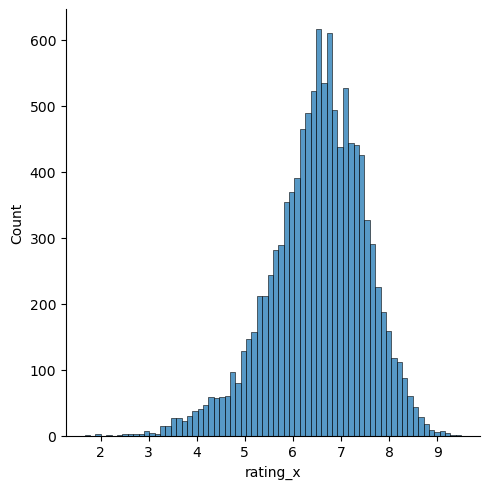

<Figure size 800x600 with 0 Axes>

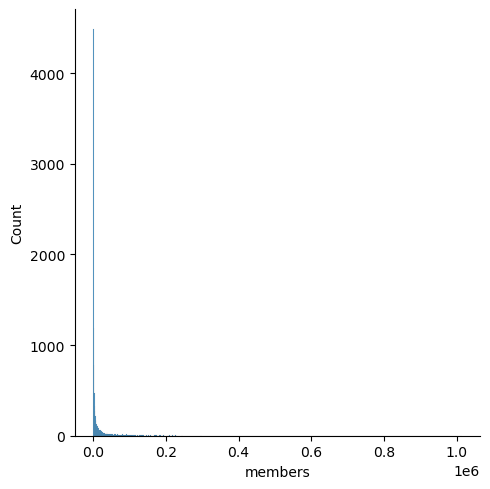

<Figure size 800x600 with 0 Axes>

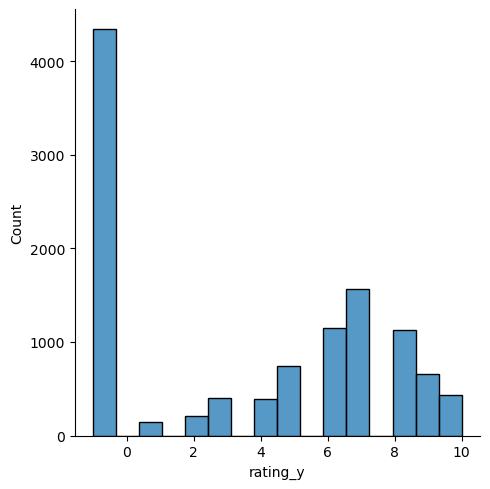

In [20]:
# episodes
x_1 = ['rating_x','members','rating_y']
for a in x_1:
    plt.figure(figsize = (8,6))
    sns.displot(data=df2, x=a)
    plt.show()

### Genre Anime apa yang paling diminati dan tidak diminati ?

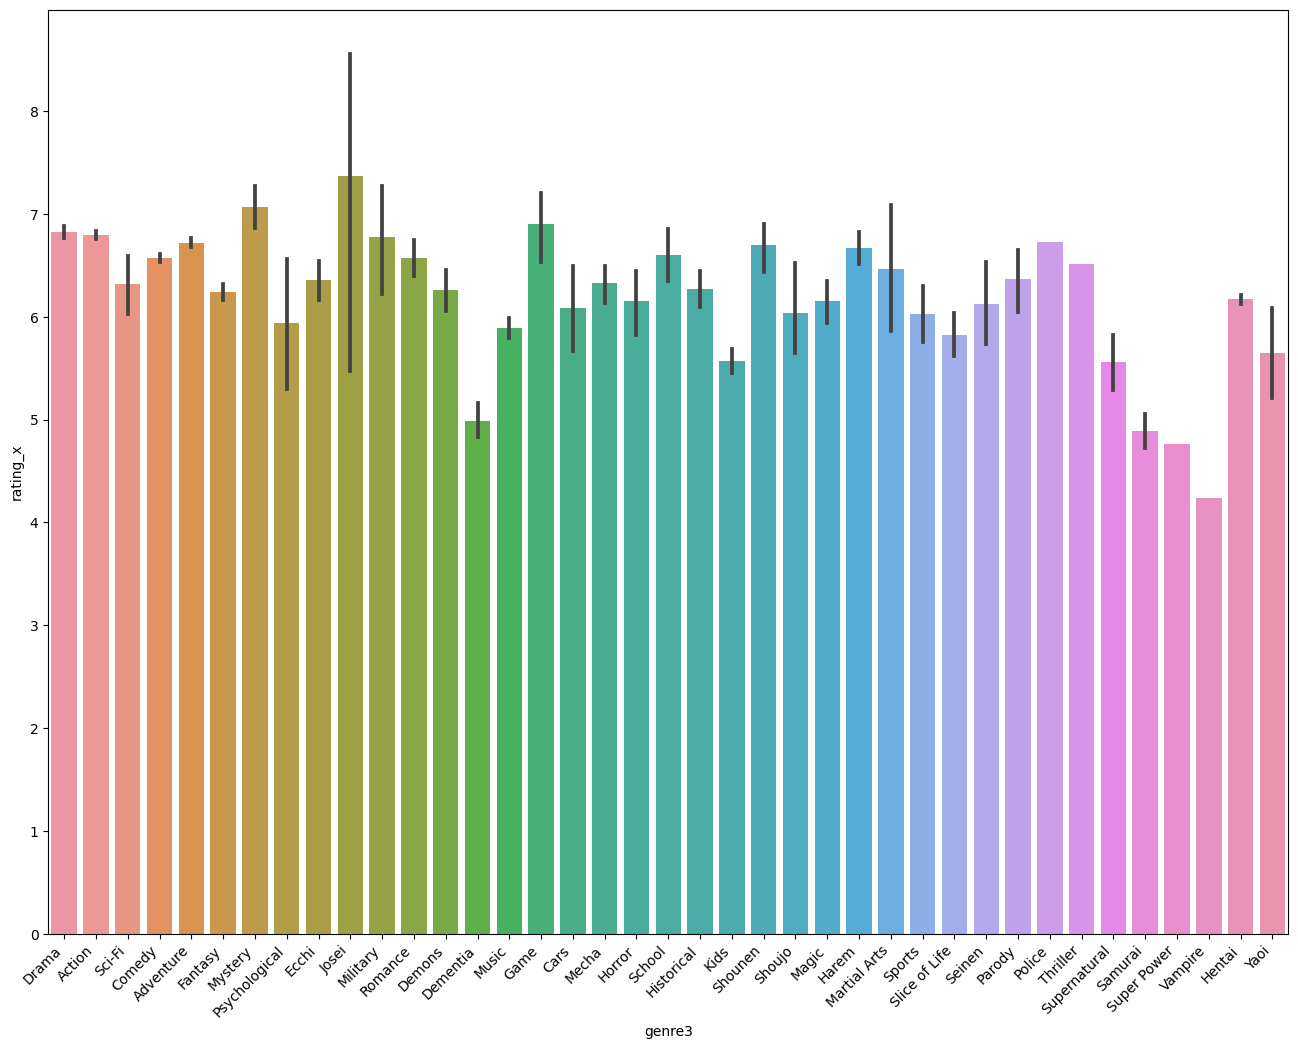

In [21]:
plt.figure(figsize=(16,12))
plot = sns.barplot(data=df2, x="genre3", y="rating_x")
# Get x-axis tick locations and labels
xtick_loc = plot.get_xticks()
xtick_labels = plot.get_xticklabels()

# Set the x-axis ticks
plot.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 10)
plt.show()

Ambik kesimpulan:
1. Anime yang paling diminati adalah Josei
2. Anime yang paling tidak diminati adalah vampire

### Apakah type berpengaruh pada rating pada anime ?

<Axes: xlabel='type', ylabel='rating_x'>

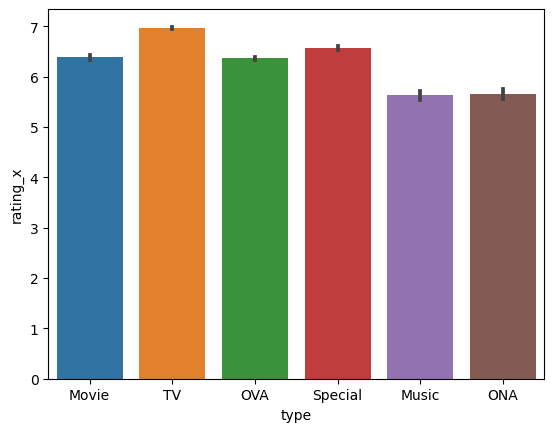

In [22]:
sns.barplot(data=df2, x="type", y="rating_x")

Type yang masih diminati adalah TV yang merujuk pada series. Contoh umumnya seperti Naruto, One Piece, Baki.

### Apakah Semakin banyak member semakin tinggi ratingnya ?

<Axes: xlabel='members', ylabel='rating_x'>

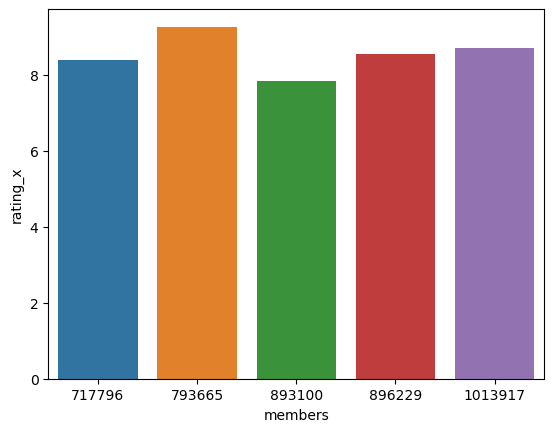

In [23]:
df3 = df2.sort_values(by=['members'], ascending=False)
df3 = df3.head()
df3
sns.barplot(data=df3, x="members", y="rating_x")

Ternyata prediksi kita salah karena selisih antara yang rating tertinggi terpaut 217k member.

### Anime apakah yang paling diminati dan yang tidak ?

#### PALING DIMINATI

In [24]:
df4 = df2.sort_values(by=['rating_x'], ascending=False)
df4 = df4.head()
df4


,name,type,episodes,rating_x,members,user_id,rating_y,genre3
7688117,Mogura no Motoro,Movie,1,9.50,62,48766,-1,Slice of Life
0,Kimi no Na wa.,Movie,1,9.37,200630,99,5,Drama
2199,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,3,10,Action
7689679,Yakusoku: Africa Mizu to Midori,OVA,1,9.25,53,48766,-1,Drama
26773,Gintama°,TV,51,9.25,114262,39,-1,Action


<Axes: xlabel='name', ylabel='rating_x'>

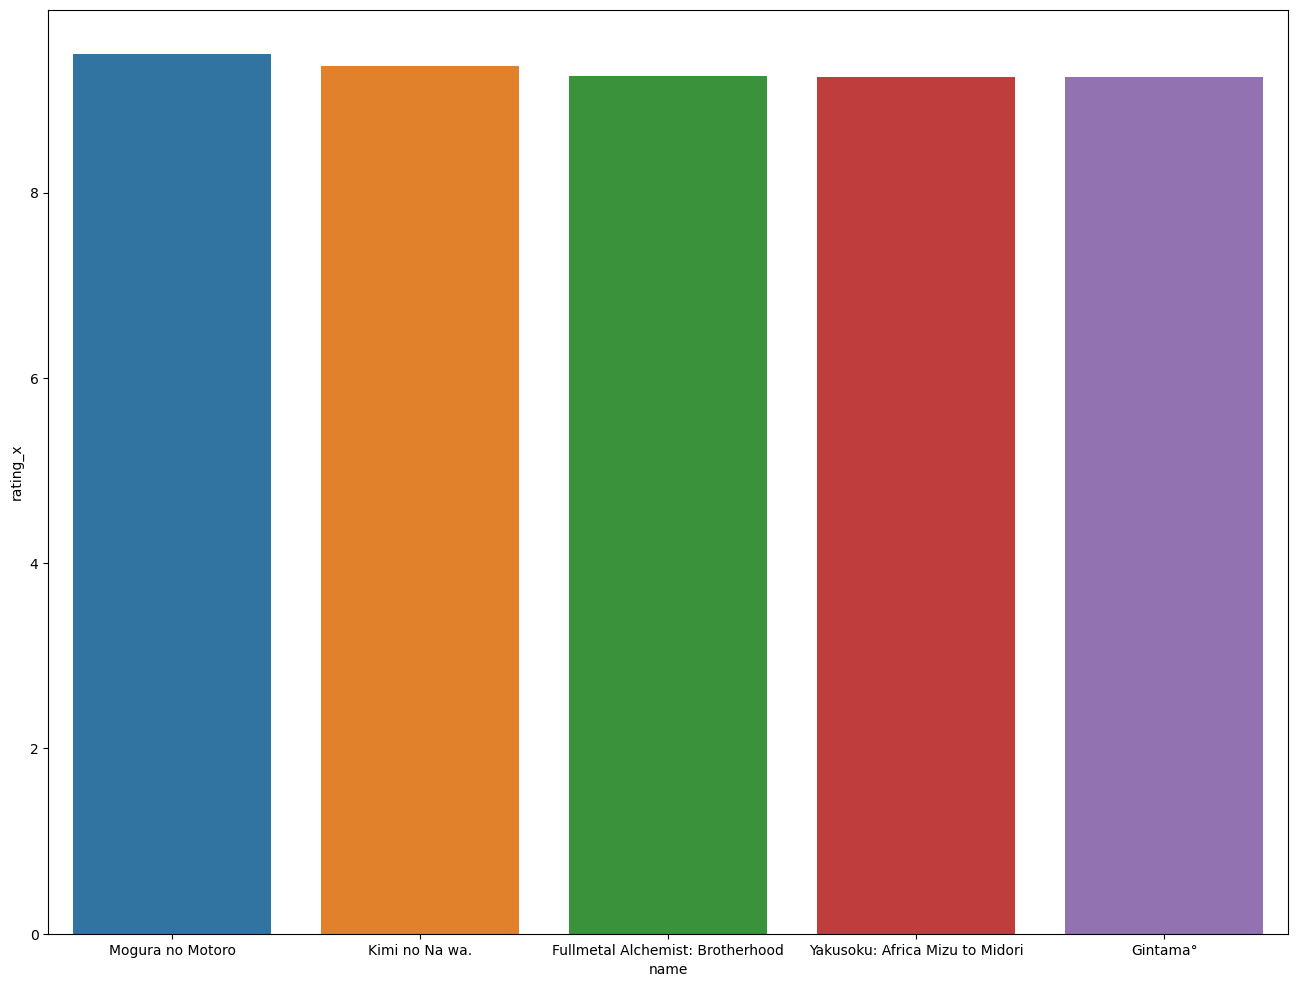

In [25]:
plt.figure(figsize=(16,12))
sns.barplot(data=df4, x="name", y="rating_x")

Anime yang paling diminati berdasarkan namanya adalah Mogura no Motoro pada peringkat pertama, sedangkan untuk series atau Tv diduduki oleh FullMetal Alchemist.

#### PALING TIDAK DIMINATI

In [26]:
df5 = df2.sort_values(by=['rating_x'], ascending=True)
df5 = df5.head()
df5

,name,type,episodes,rating_x,members,user_id,rating_y,genre3
7688655,Platonic Chain: Ansatsu Jikkouchuu,Special,1,1.67,51,48766,-1,Sci-Fi
7813650,Hi Gekiga Ukiyoe Senya Ichiya,Movie,1,1.92,129,27364,-1,Action
7685765,Tenkuu Danzai Skelter+Heaven,OVA,1,2.00,7680,17,2,Mecha
7685674,Utsu Musume Sayuri,OVA,1,2.14,4047,1437,-1,Comedy
7684543,Hametsu no Mars,OVA,1,2.37,27557,17,1,Horror


<Axes: xlabel='name', ylabel='rating_x'>

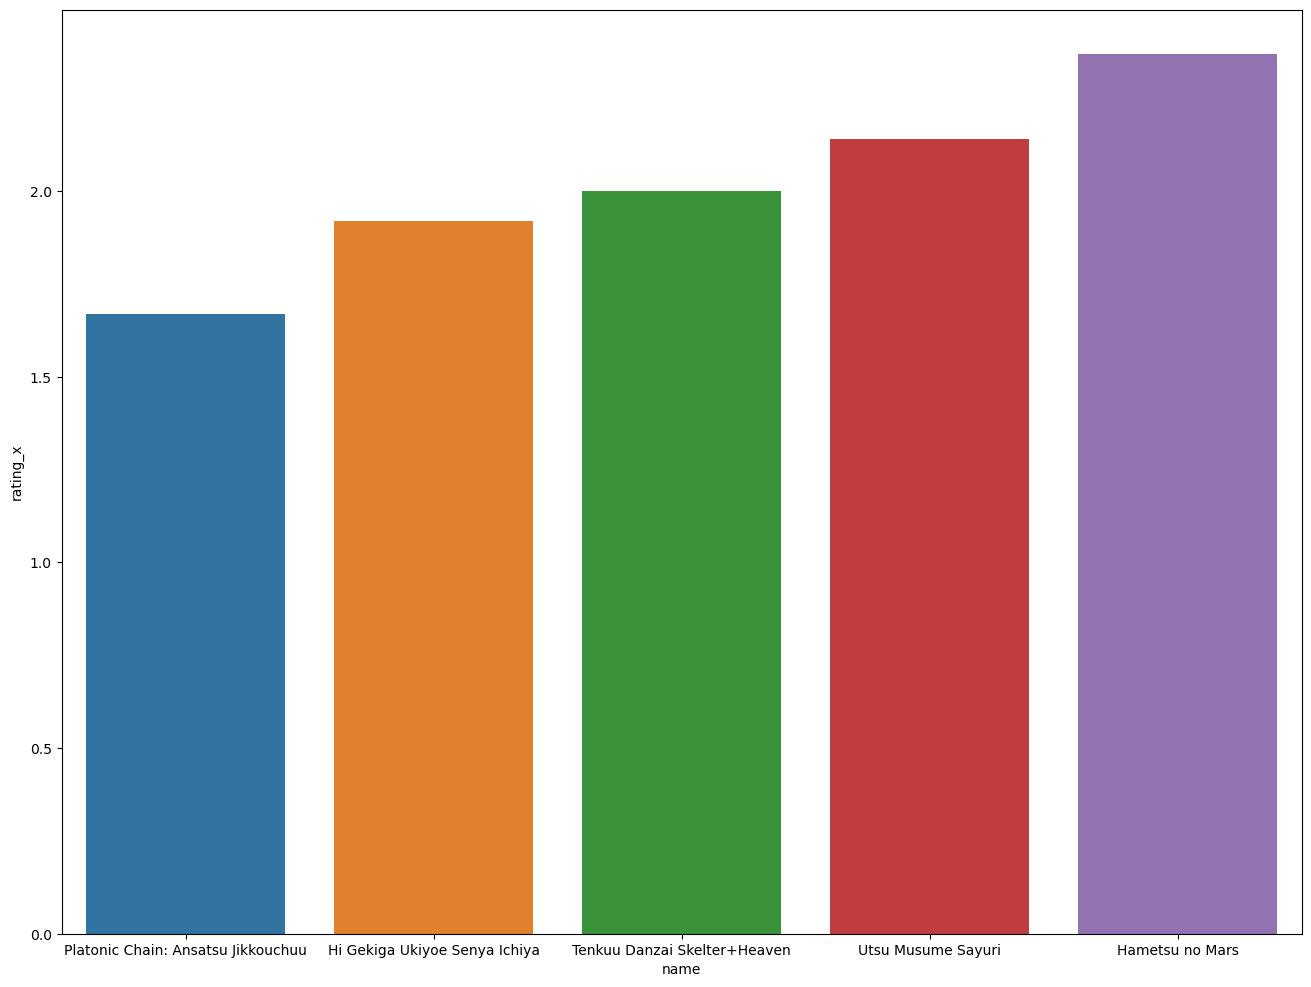

In [27]:
plt.figure(figsize=(16,12))
sns.barplot(data=df5, x="name", y="rating_x")

Anime yang paling tidak disukai adalah Platonic Chain: Ansatsu Jikkouchuu yang bertipekan Special. 

### Rekomendasi Bisnis

1. Seleksi Anime yang akan dipublish harus memiliki latar belakang seorang gadis SMA. Anime yang ada unsur cerita Vampir harus dikombinasikan dengan latar cerita SMA agar membuat rating pada genre ini meningkat.
2. Jadi type dengan rating tertinggi adalah TV maka untuk anime yang akan dipilih adalah anime yang bercerita atau memiliki alur yang cukup panjang nantinya akan dibuatkan movie juga.
3. Banyaknya member tidak sejalan dengan rating yang diberikan. Sehingga pemilihan anime yang memiliki genre atau type yang banyak membernya bisa dijadikan acuan dalam pemilihan anime kedepanya.
4. Pemilihan anime yang akan di publish sebaiknya melihat kepada kesuksesan anime yang sebelumnya walau ini tidak menjadi acuan baku.